## Lab 2: Zombie Apocalypse 🧟
__Version 1__

The city is under attack from zombies and several vaccines have been proposed but the government isn't sure which one to use. Your job is to create a simulation to test the vaccines and analyze them using inferential statistics so you can make a recommendation.

A sample of the population has been created in the file "lab2-sample.csv". The data contain the status of an individual (1 = infected, 0 = non-infected), and their x and y coordinates in the city. Scientists have determined that a person has a 30% chance per day of being infected by a zombie within a 5 unit radius (all distances have been converted to standard units).

Follow the prompts below that guide you through your research. When you are finished submit an HTML version of your notebook.

Good luck, the city is counting on you!

---

Import pandas, lab2lib, and any other modules you need here.

In [49]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.animation
import numpy as np


Load the `lab2-sample.csv` data into a dataframe and get familiar with it.

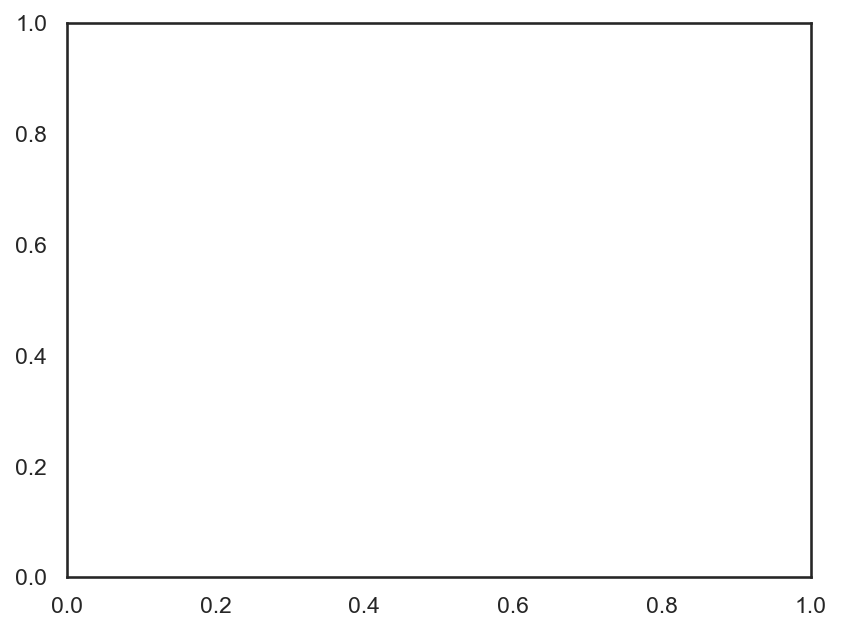

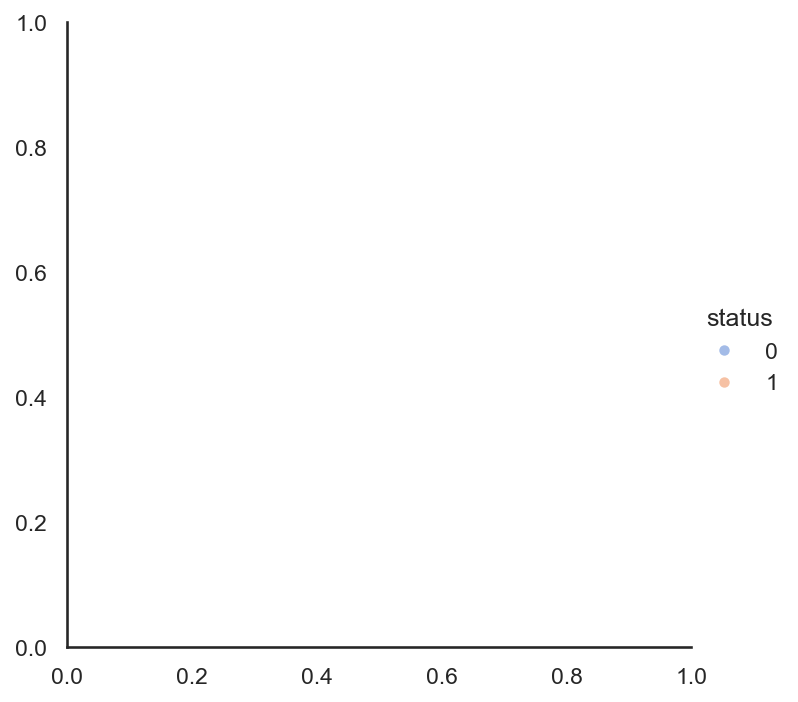

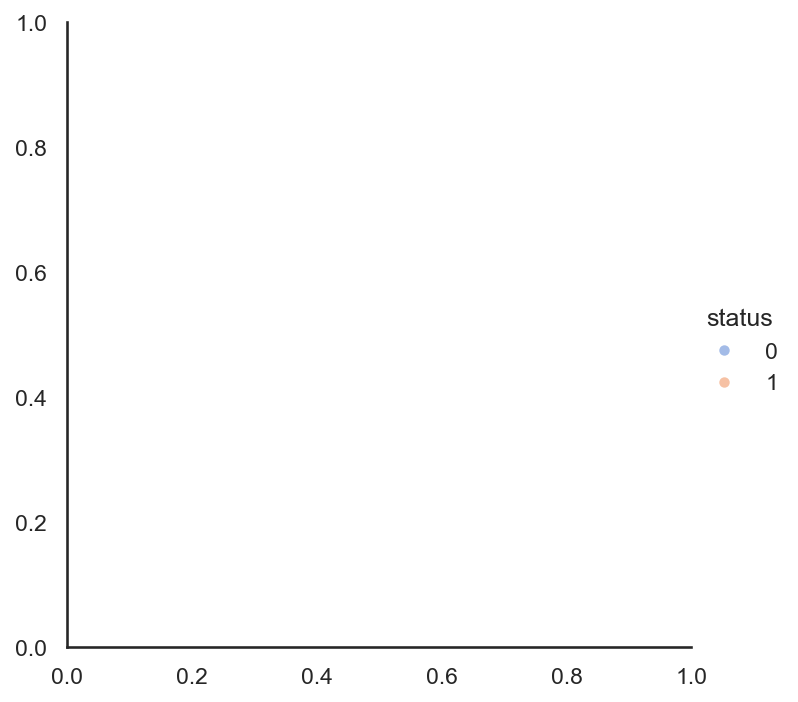

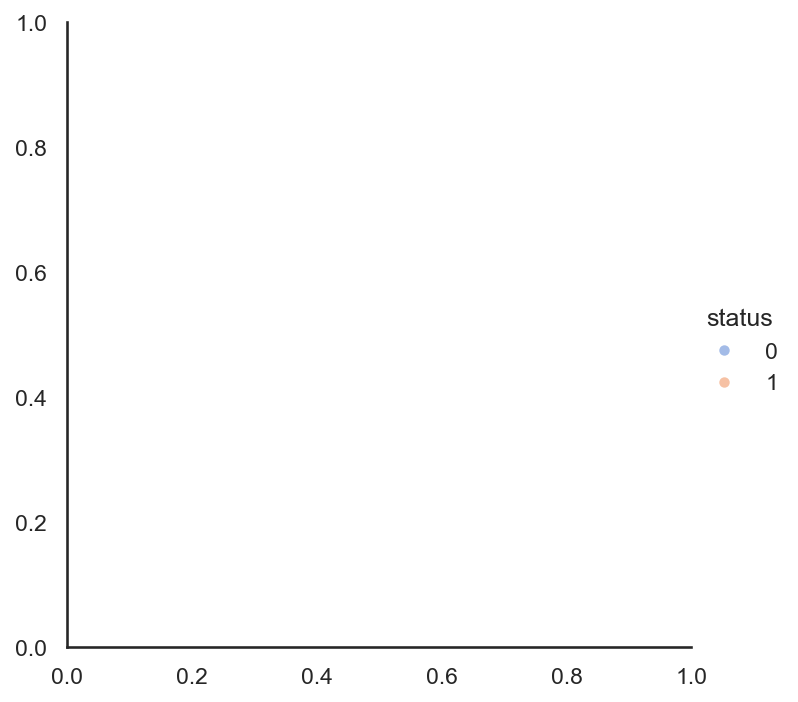

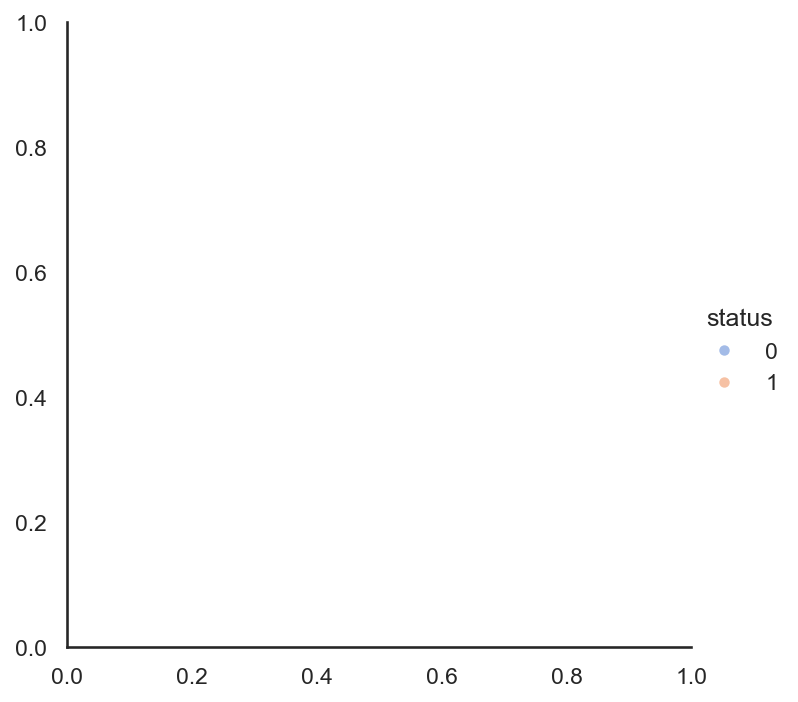

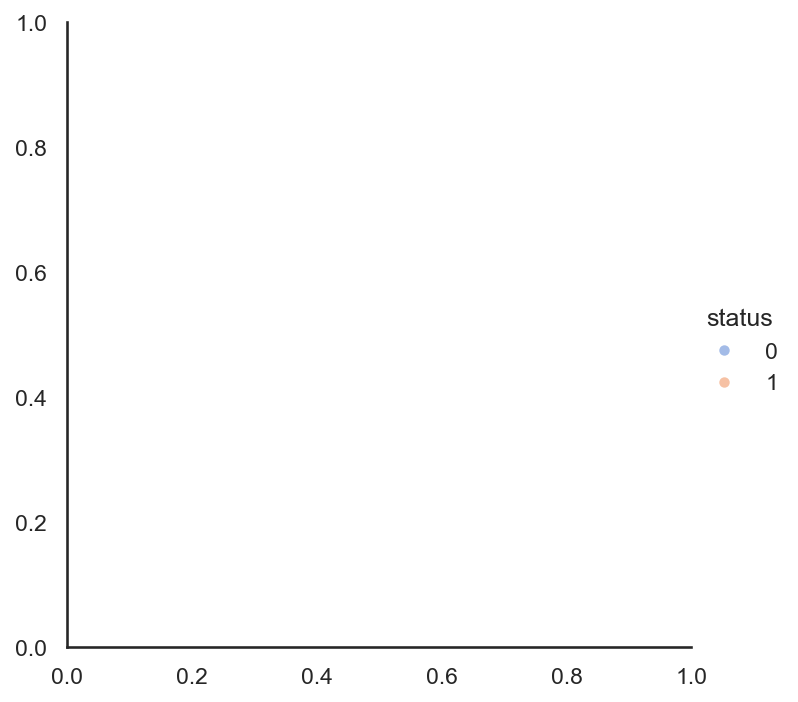

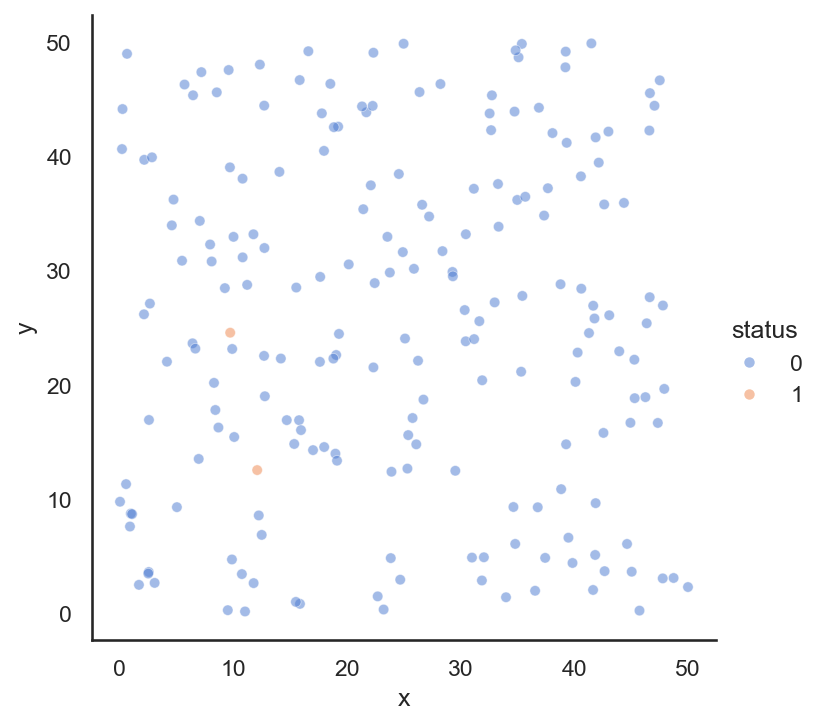

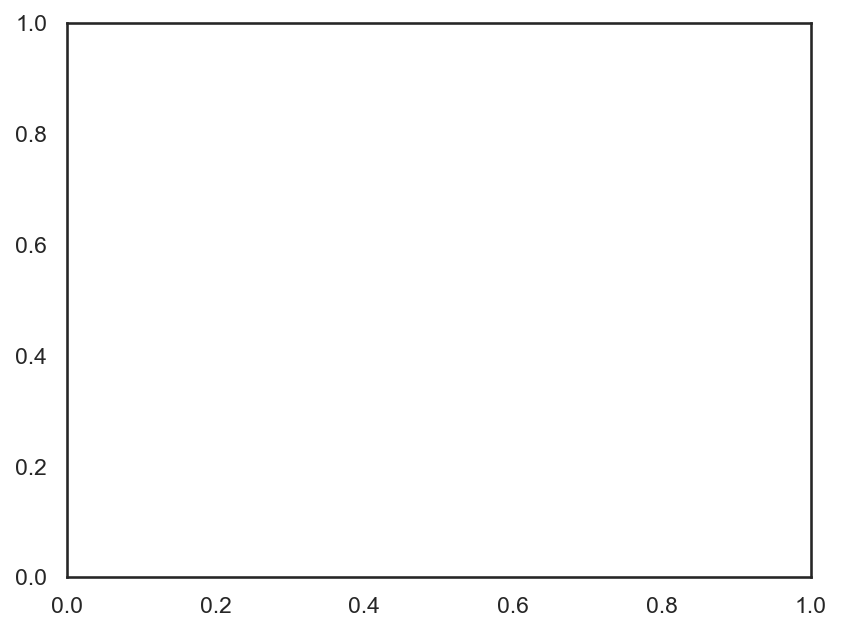

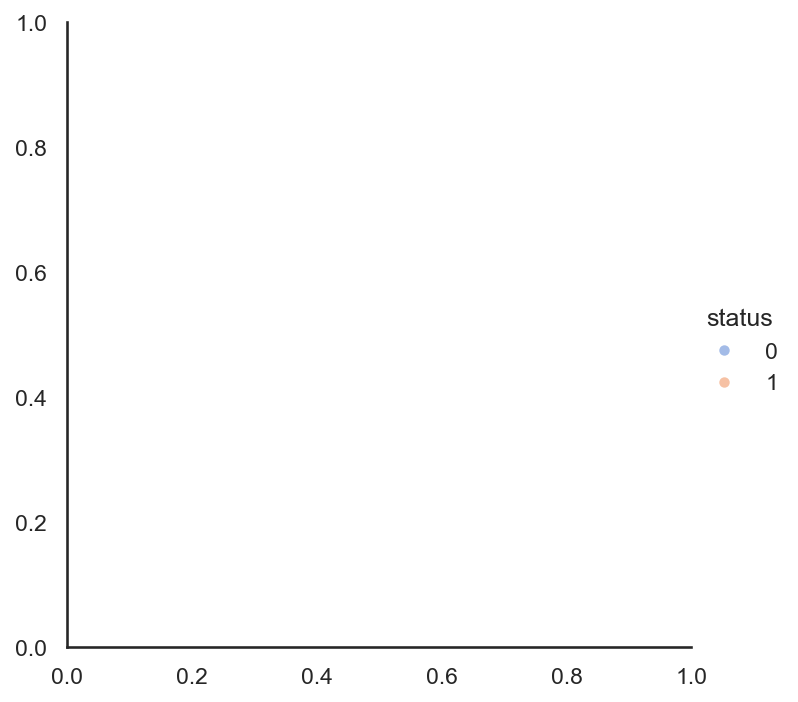

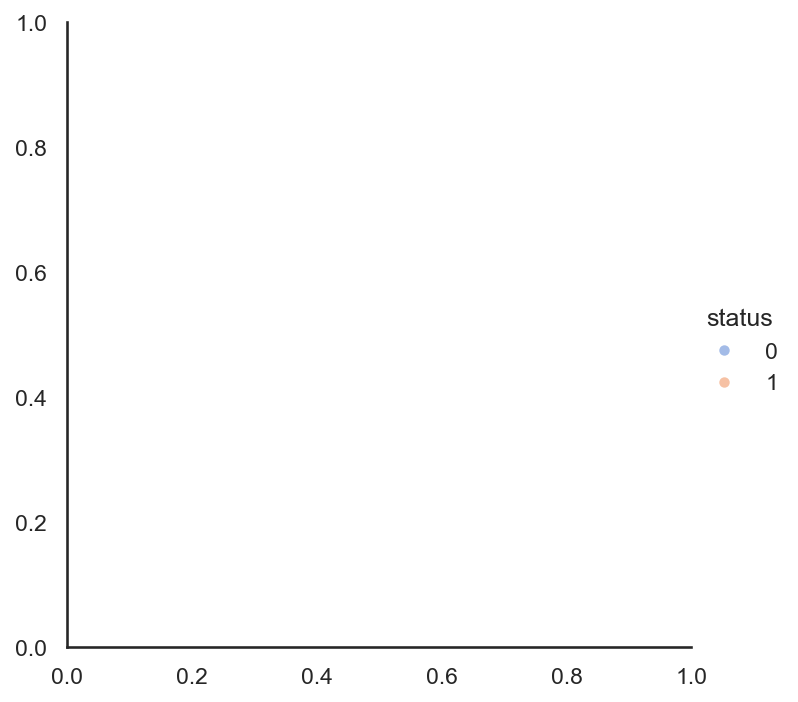

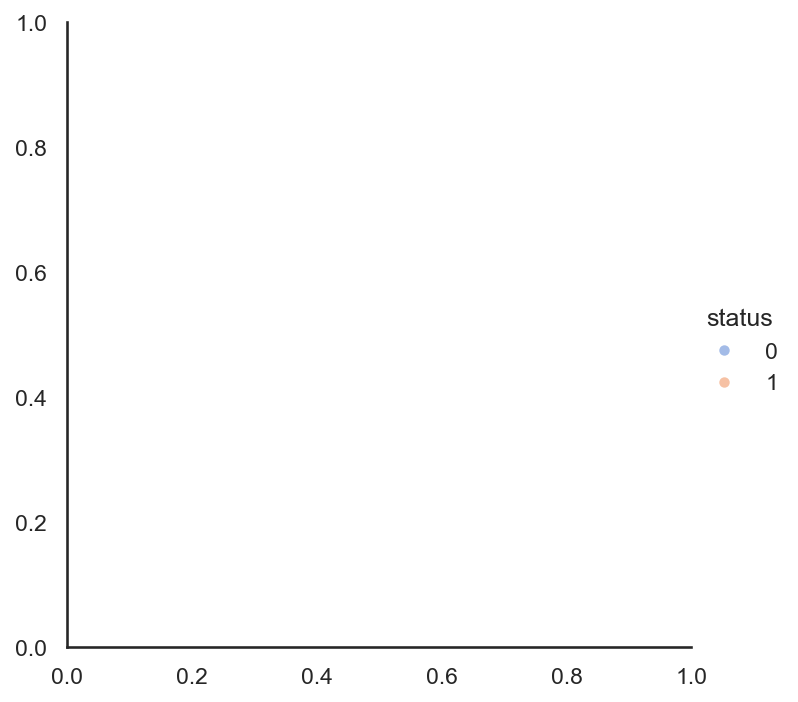

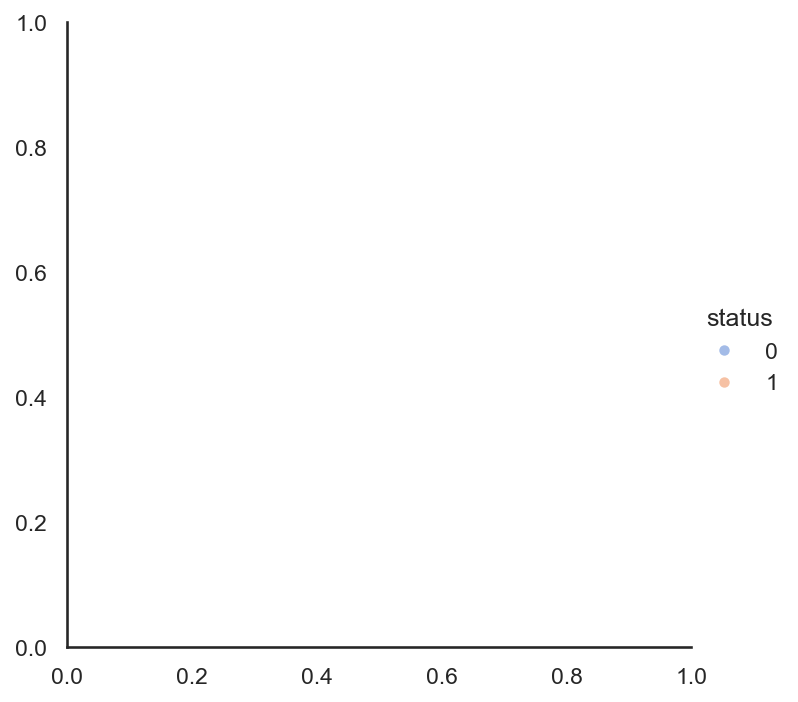

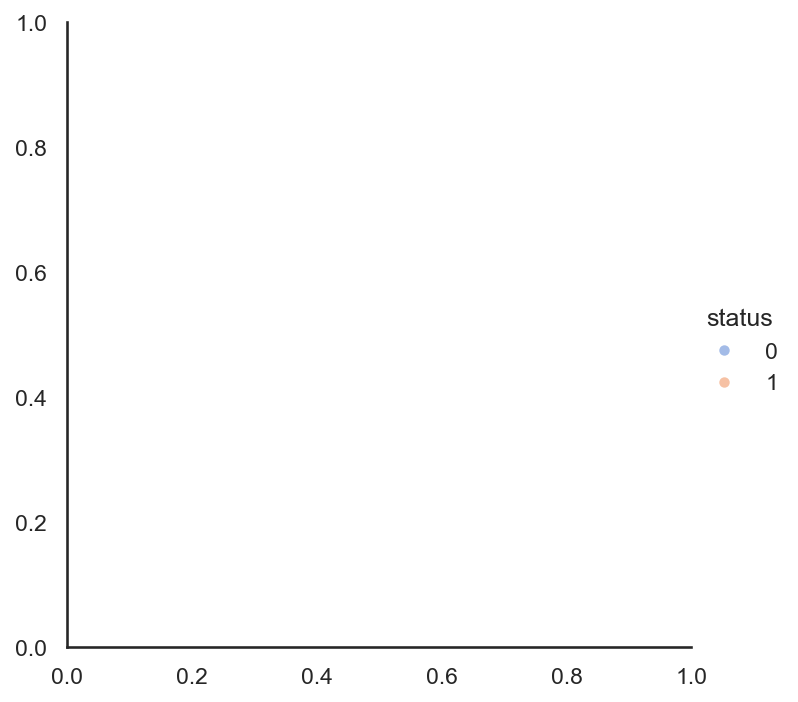

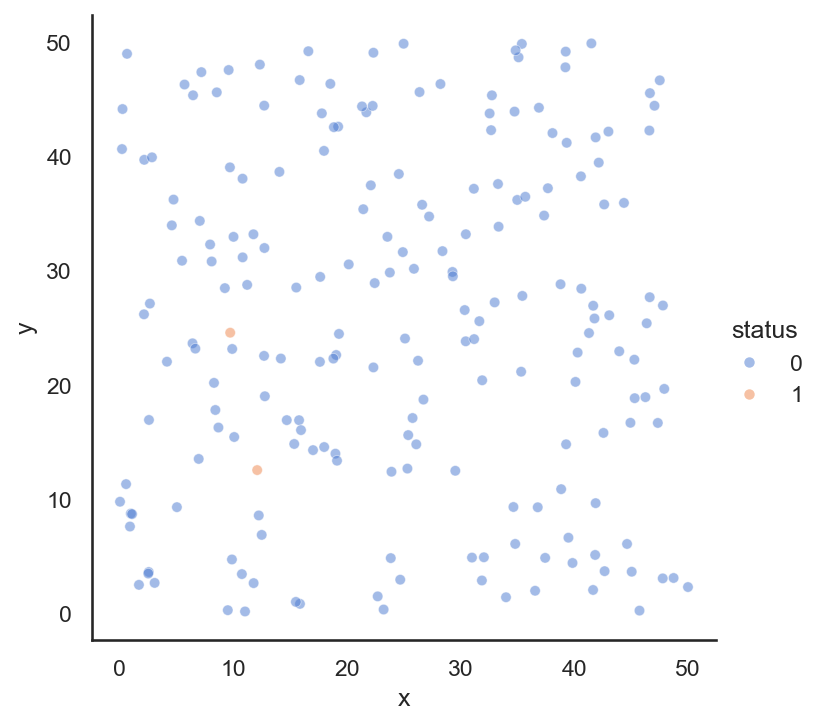

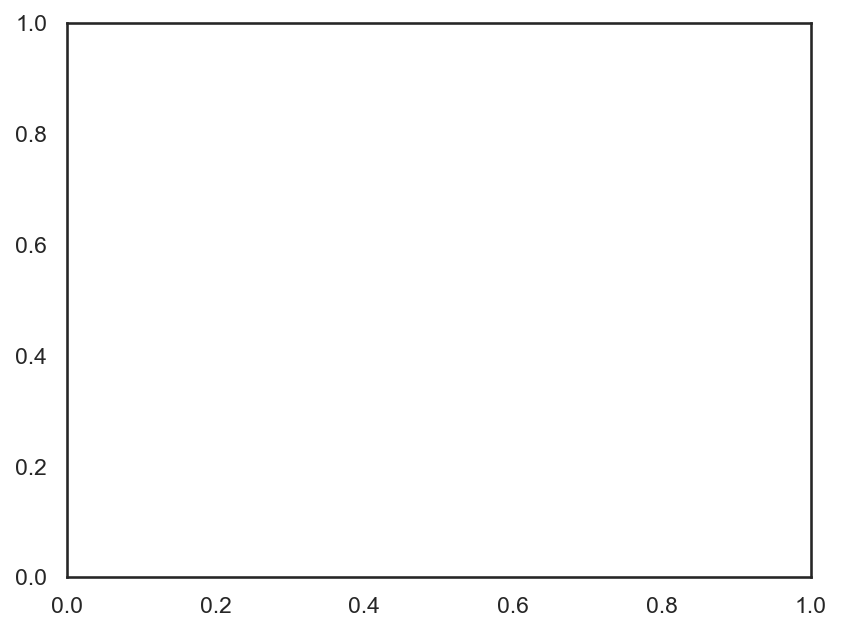

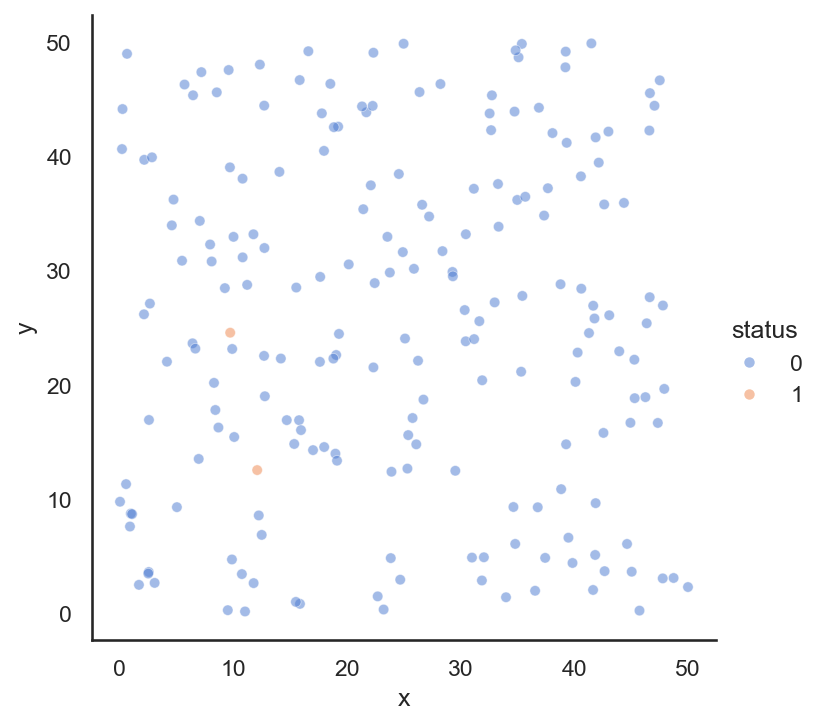

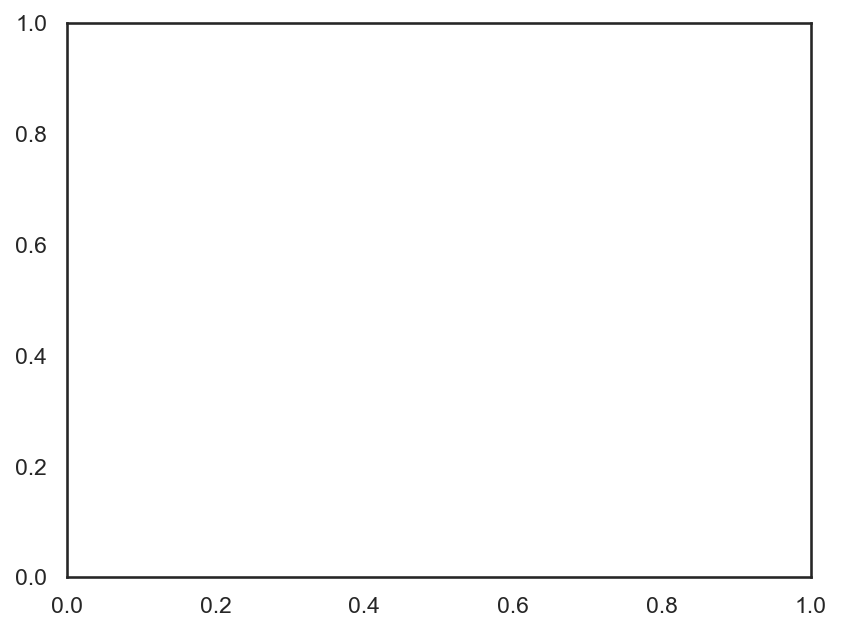

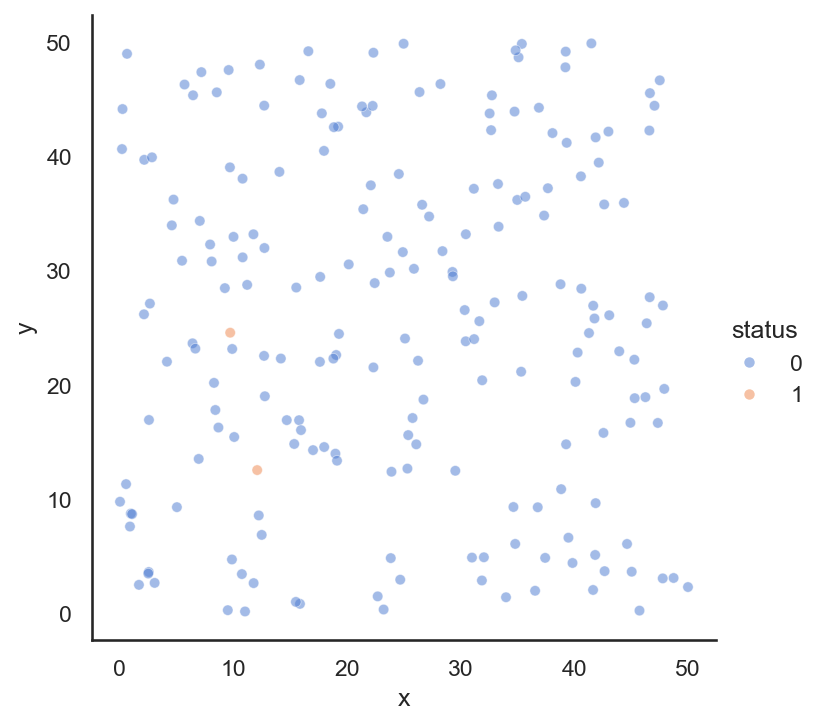

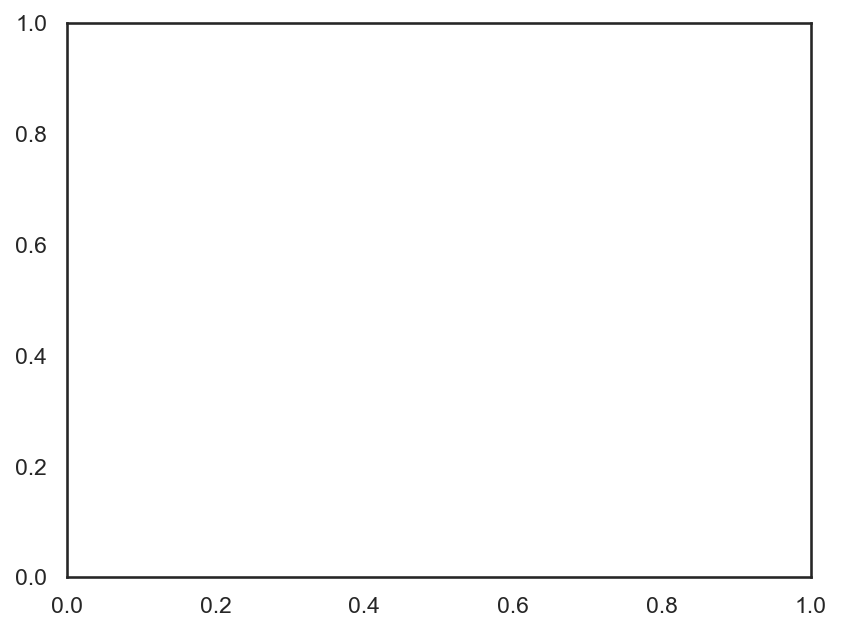

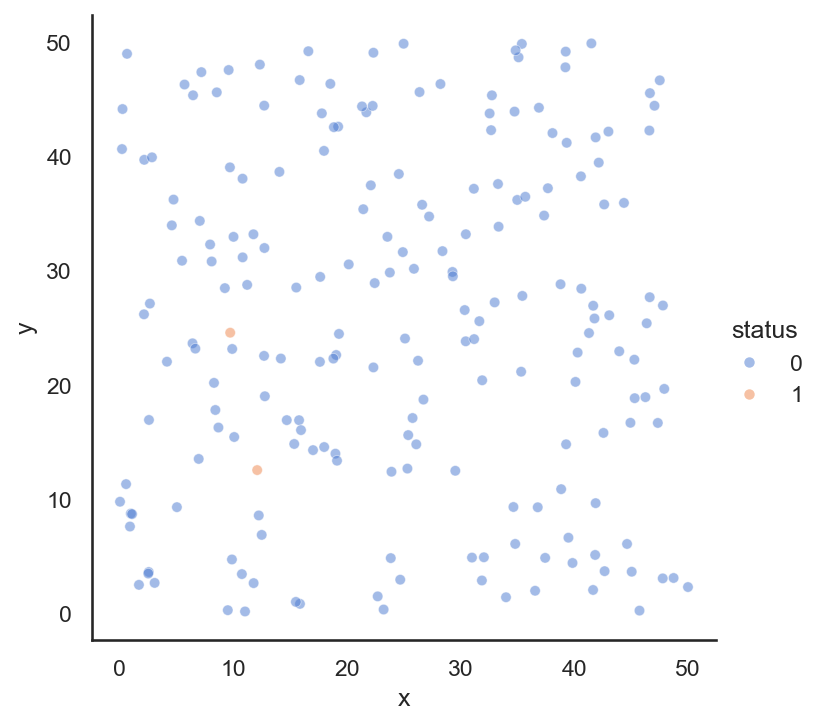

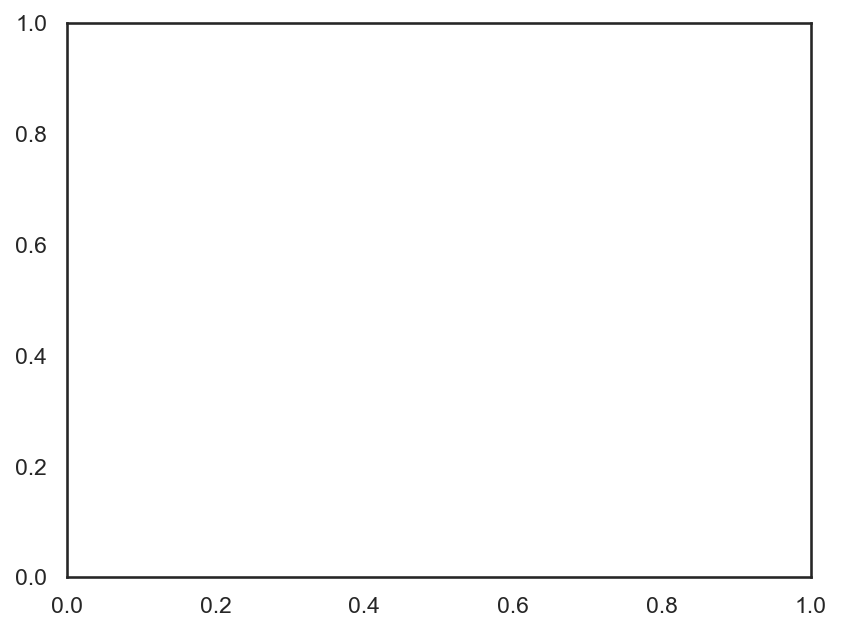

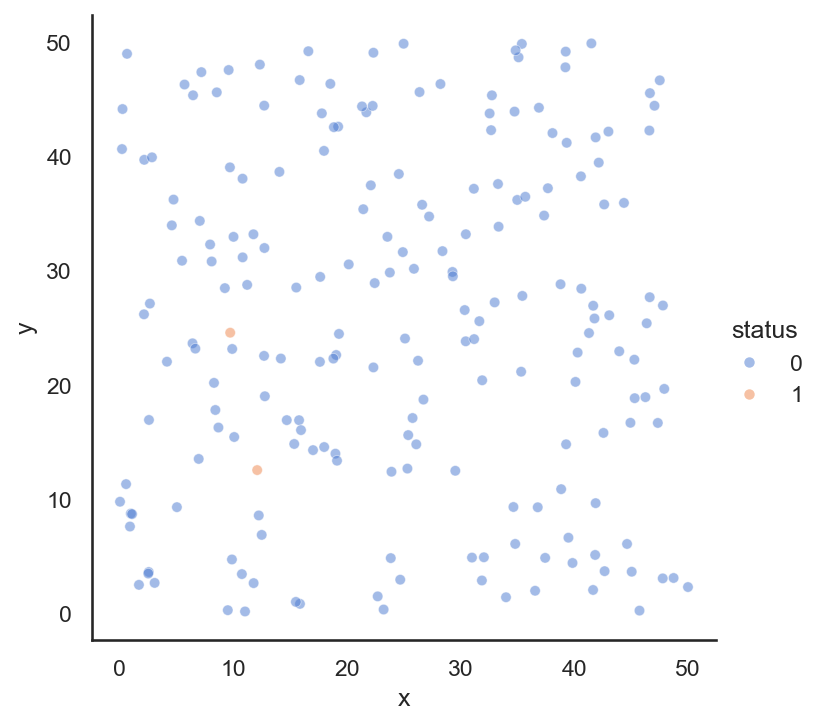

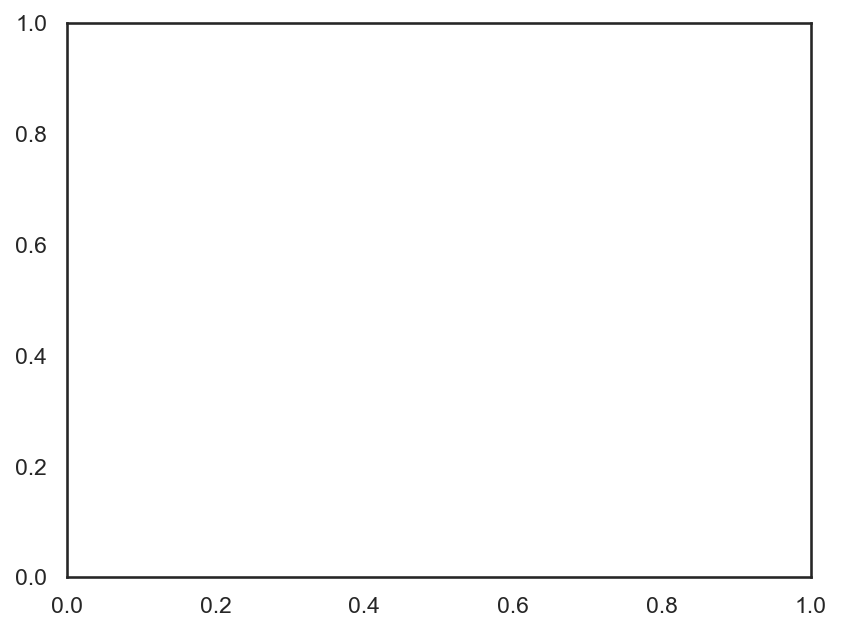

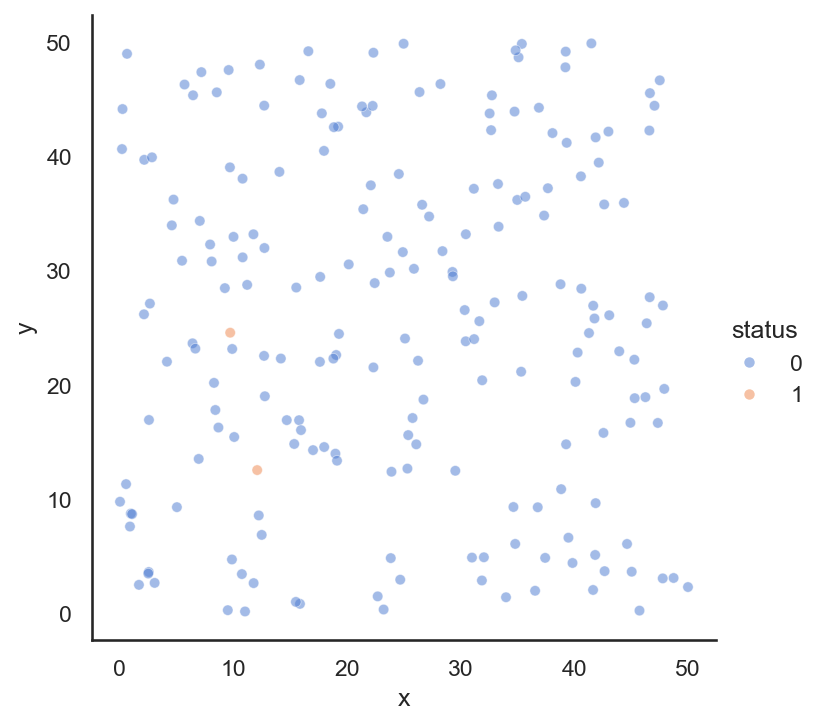

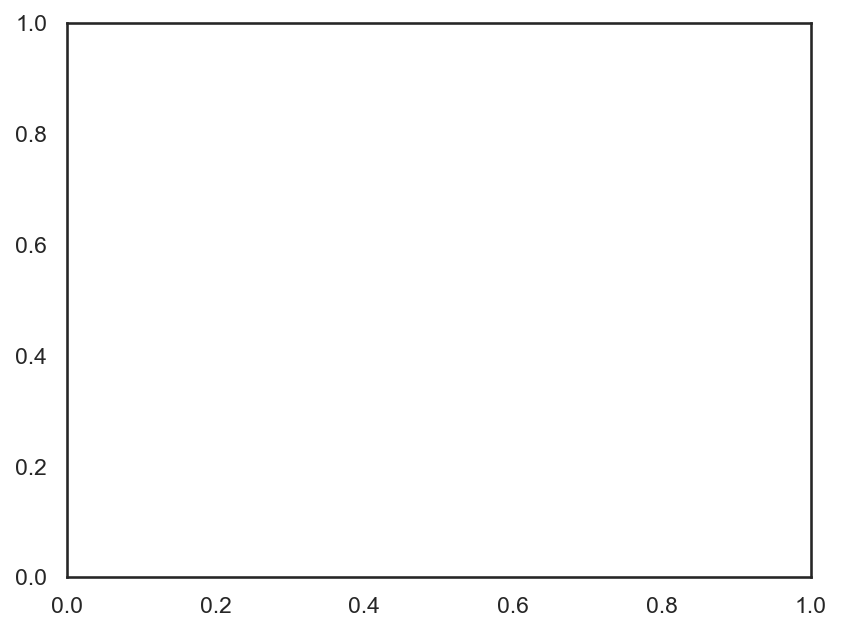

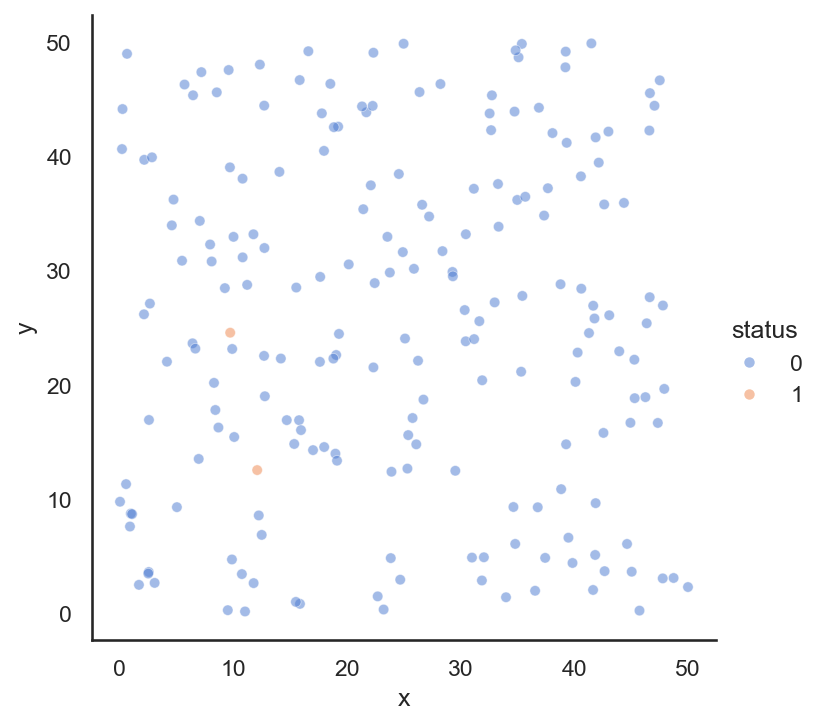

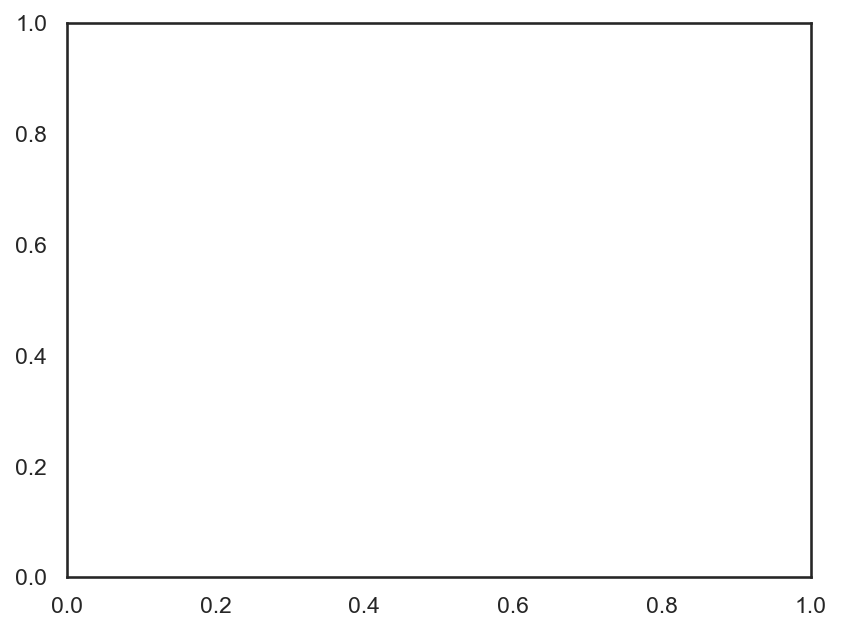

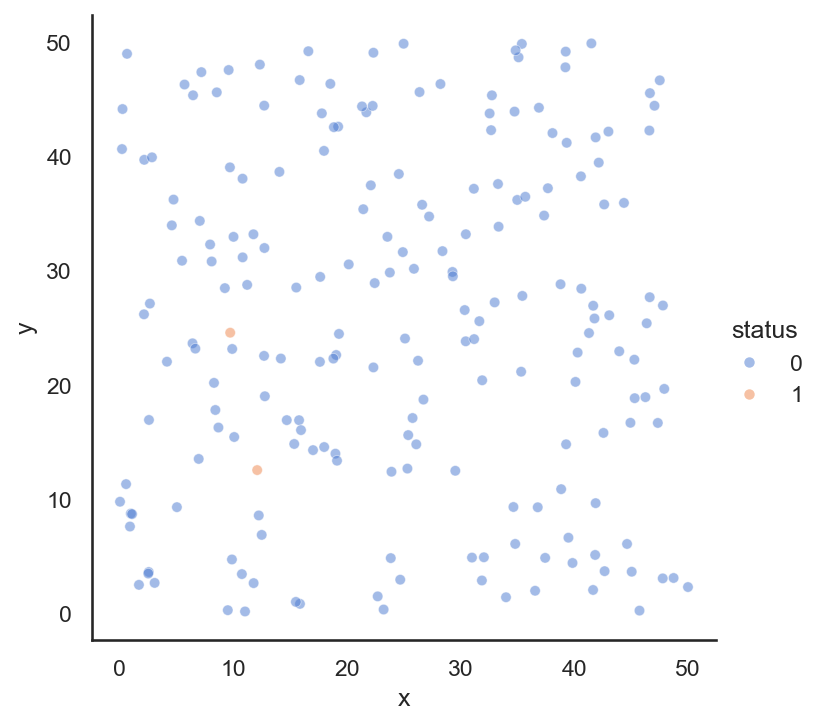

In [90]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sample = pd.read_csv('lab2-sample.csv')
#sample[sample['status'] == 1 ].head()
#sample_heatmap = sns.swarmplot(sample, x=sample['x'], y = sample['y'], hue = sample['status'], dodge = True )


plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, ax = plt.subplots()

def animate(t):
    plt.cla()
    fig = sns.relplot(x="x", y="y", hue ="status", hue_norm = (0, 1),  size="status", sizes=(25, 25), alpha=.5, palette="muted", height=5, data=sample)
    plt.show()
matplotlib.animation.FuncAnimation(fig, animate, frames=5)


#import seaborn as sns
#%matplotlib inline
#sns.set_theme(style="white")

# Load the example mpg dataset

# Plot miles per gallon against horsepower with other semantics
#sns.relplot(x="x", y="y", hue ="status", hue_norm = (0, 1),  size="status", sizes=(25, 25), alpha=.5, palette="muted", height=5, data=sample)

#plt.show()

#sample['y'].describe()

---

The first thing you'll need is a Python function to simulate a single day. Create a function which takes the following parameters:
1. A dataframe of the population to simulate
2. The infection radius distance (default to 5)
3. The infection probability of non-vaccinated people (default to .3)
4. The infection probability of vaccinated people (default to -1 to indicate no vaccine)

The function should iterate through all non-infected people (status == 0). For each person it should find all infected people within the infection radius and generate a random number to determine if an infection event should take place. If the vaccinated infection probability is not -1 and the population dataframe includes a `vaccinated` column and the non-infected person is vaccinated (`vaccinated` == 1) the infection probablity of vaccinated people should be used to determin the infection event, otherwise the infection probability of non-vaccinated people should be used. If infected, a person's status should be set to 1. The function should return the population dataframe.

Run some tests on your function to ensure it's working properly. A unit test is suggested below to get you started (change the name to match your function).

In [ ]:
test1 = day( pd.read_csv("lab2-sample.csv"), 5, 1)
assert( test1.status.value_counts()[1] == 34 )

---

Create a function to run a complete simulation. The function should take the following parameters:
1. A dataframe of the population to simulate
2. The number of days to simulate (default to 30)
3. The infection radius distance (default to 5)
4. The infection probability of non-vaccinated people (default to 3)
5. The vaccine effectiveness (default to 0)
6. The vaccine rate (default to 0)

The function should first make a copy of the population dataframe (use the DataFrame.copy() method). If the vaccine effectiveness is not 0, the population should first be vaccinated. The number of vaccinations should equal the number of non-infected individuals times the vaccine rate. The individuals to be vaccinated should be chosen at random. When vaccinating, create a `vaccinated` column and set vaccinated individuals to 1. After vaccination the function should call your single day simulation function for the number days specified in the parameter to this function. When calling the day function, pass in the appropriate arguments. To calculate the argument for the infection probability for vaccinated people, use the probability of infection for non-vaccinated people scaled by (1 - vaccine effectiveness). Return the modified population dataframe.

Test your function by running it on "lab2-sample.csv" with and without vaccines. When testing vaccines try using a vaccine effectiveness and rate both set to 1, then confirm that no infections occur.

In [ ]:
testvac1 = sim(pd.read_csv("lab2-sample.csv"), v_eff=1, v_rate=1)
assert( testvac1.status.value_counts()[1] == 2)

---

Create a function that runs iterations of an experiment on a data file and saves the number of infected indivduals for each run and returns these in a list. The first parameter should be the file (default to "lab2-sample.csv"), the second parameter should be the number of iterations (default 10) and the remaining parameters should match those required in your simulation function above (with the exception of the population dataframe).

---

Call your iterative function using defaults and save the results as a baseline.

Call your iterative function using using a vaccine with 60% effectiveness and an 80% rate and save the results as vaccine 1.

Call your iterative function using using a vaccine with 80% effectiveness and a 60% rate and save the results as vaccine 2.

Run a two-sided proportions test comparing the proportion of the means of infections in the baseline and vaccine 1 to determine if they are significantly different.

Run the same test as above comparing vaccine 1 and vaccine 2.

Interpret the results of your two proportions test.

Based on these results, find a vaccine effectiveness and rate that minimizes infections with the constraint that the sum of the effectiveness and rate must be 1.4 or less. (Both previous vaccine tests satisfy this constraint: .8 + .6 <= 1.4 and .6 + .8 <= 1.4). Show that your vaccine is significantly different than vaccine 1 and 2.

Finally run your vaccine once on the entire population "lab2.csv" (this will take some time) and report whether you've saved the city (infection rate contained to 50%).

---

### Submission Instructions

Be sure to ***SAVE YOUR WORK***!  

Next, select File -> Save and Export As ... -> HTML

Then submit your notebook HTML file to Canvas.